In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
pd.options.display.max_columns = 30

In [4]:
graf_raw = pd.read_csv('Data/311_Graffiti_Removal_2016.csv')
vacant_raw = pd.read_csv('Data/311_Vacant_and_Abandoned_Buildings_2016.csv')
pot_raw = pd.read_csv('Data/311_Pot_Holes_2016.csv')
sani_raw = pd.read_csv('Data/311_Sanitation_2016.csv')
comm_raw = pd.read_csv('Data/CommAreas.csv')

In [5]:
graf = graf_raw[graf_raw['Status'].isin(['Open', 'Completed'])][['Service Request Number','Creation Date', 'Completion Date','Type of Service Request', 'What Type of Surface is the Graffiti on?', 'ZIP Code', 'Community Area', 'Latitude', 'Longitude', 'Location']]
graf.rename(columns={'What Type of Surface is the Graffiti on?': 'Subtype'}, inplace=True)
pot = pot_raw[pot_raw['STATUS'].isin(['Open', 'Completed'])][['SERVICE REQUEST NUMBER', 'CREATION DATE', 'COMPLETION DATE', 'TYPE OF SERVICE REQUEST', 'MOST RECENT ACTION', 'ZIP', 'Community Area', 'LATITUDE', 'LONGITUDE', 'LOCATION']]
pot.columns = graf.columns
sani = sani_raw[sani_raw['Status'].isin(['Open', 'Completed'])][[ 'Service Request Number','Creation Date', 'Completion Date', 'Type of Service Request', 'What is the Nature of this Code Violation?', 'ZIP Code', 'Community Area', 'Latitude', 'Longitude', 'Location']]
sani.columns = graf.columns
vacant = vacant_raw[['SERVICE REQUEST NUMBER', 'DATE SERVICE REQUEST WAS RECEIVED', 'DATE SERVICE REQUEST WAS RECEIVED','SERVICE REQUEST TYPE', 'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)','ZIP CODE', 'Community Area', 'LATITUDE', 'LONGITUDE', 'Location']]
vacant.columns = graf.columns

In [6]:
master = pd.concat([graf, pot, sani, vacant], ignore_index = True)

In [7]:
comm = comm_raw[['AREA_NUMBE', 'COMMUNITY']].rename(columns={'AREA_NUMBE':'Community Area', 'COMMUNITY': 'Community'})
master = master.join(comm, on='Community Area', rsuffix='_other')

In [8]:
master

,Service Request Number,Creation Date,Completion Date,Type of Service Request,Subtype,ZIP Code,Community Area,Latitude,Longitude,Location,Community Area_other,Community
0,16-00001120,01/01/2016,01/04/2016,Graffiti Removal,Brick - Unpainted,60639.0,20.0,41.922754,-87.726920,"(41.92275371369149, -87.72691963120627)",20.0,HERMOSA
1,16-00001753,01/01/2016,01/04/2016,Graffiti Removal,Brick - Unpainted,60647.0,22.0,41.930270,-87.711830,"(41.93027022573564, -87.7118303754877)",22.0,LOGAN SQUARE
2,16-00002928,01/01/2016,01/04/2016,Graffiti Removal,Brick - Unpainted,60632.0,59.0,41.826349,-87.684472,"(41.82634906722627, -87.68447240074919)",62.0,WEST ELSDON
3,16-00003519,01/01/2016,01/04/2016,Graffiti Removal,Metal - Painted,60626.0,1.0,42.007761,-87.668046,"(42.00776133839233, -87.66804558302428)",36.0,OAKLAND
4,16-00003521,01/01/2016,01/04/2016,Graffiti Removal,Metal - Painted,60626.0,1.0,42.007765,-87.667774,"(42.00776549837537, -87.66777445467486)",36.0,OAKLAND
5,16-00003528,01/01/2016,01/04/2016,Graffiti Removal,Metal - Painted,60626.0,1.0,42.008023,-87.665979,"(42.00802253716615, -87.66597875635996)",36.0,OAKLAND
6,16-00003575,01/01/2016,01/04/2016,Graffiti Removal,Metal - Painted,60626.0,1.0,42.008023,-87.665979,"(42.00802253716615, -87.66597875635996)",36.0,OAKLAND
7,16-00003750,01/01/2016,01/04/2016,Graffiti Removal,Brick - Painted,60626.0,1.0,42.006805,-87.665723,"(42.006805190946984, -87.66572328161813)",36.0,OAKLAND
8,16-00003984,01/01/2016,01/04/2016,Graffiti Removal,Brick - Unpainted,60618.0,16.0,41.955313,-87.712811,"(41.955312598978296, -87.71281066727191)",17.0,DUNNING
9,16-00004096,01/01/2016,01/04/2016,Graffiti Removal,Brick - Unpainted,60618.0,16.0,41.955667,-87.721853,"(41.95566675438044, -87.72185339657793)",17.0,DUNNING


In [105]:
count_by_type = master['Type of Service Request'].value_counts()

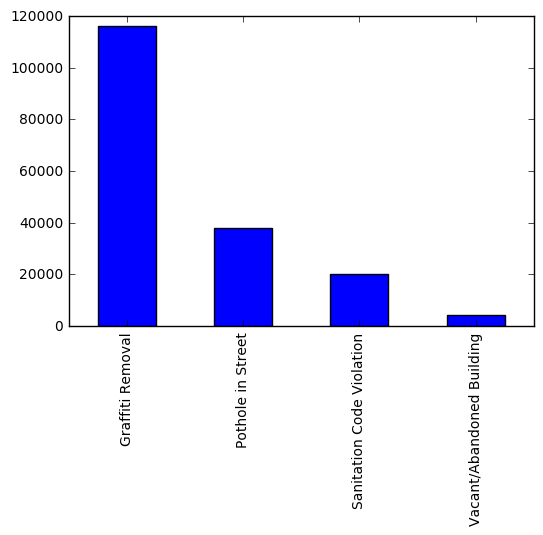

In [106]:
count_by_type.plot("bar")

In [167]:
master['Creation Date'] = pd.to_datetime(master['Creation Date'],infer_datetime_format=True)
master['Completion Date'] = pd.to_datetime(master['Completion Date'],infer_datetime_format=True)
master['Month'] = pd.DatetimeIndex(master['Creation Date']).month
master['Response Time'] = (master['Completion Date']  - master['Creation Date']).dt.days

In [108]:
count_by_month_by_type = pd.pivot_table(master, values='Service Request Number', index=['Month'], columns=['Type of Service Request'], aggfunc=lambda x: len(x.unique()))

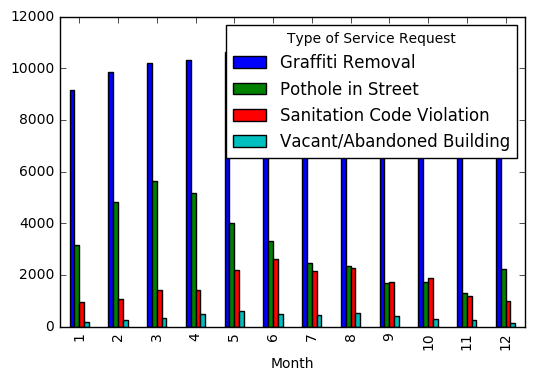

In [109]:
count_by_month_by_type.plot.bar()

In [118]:
count_by_month_by_subtype = pd.pivot_table(master, values='Service Request Number', index=['Month'], columns=['Type of Service Request', 'Subtype'], aggfunc=lambda x: len(x.unique())).fillna(0) 
count_by_month_by_subtype.rename(columns={'Graffiti Removal': 'Graffiti Removal-Type of Surface', 'Pothole in Street': 'Pothole in Street- Most Recent Action', 'Sanitation Code Violation': 'Sanitation Code Violation - Nature of this Code Violation', 'Vacant/Abandoned Building': 'Vacant/Abandoned Building-ANY PEOPLE USING PROPERTY?'}, inplace=True)

In [119]:
count_by_month_by_subtype

Type of Service Request Graffiti Removal-Type of Surface          \
Subtype                                  Aluminum Siding Asphalt   
Month                                                              
1                                                  186.0     4.0   
2                                                  307.0     9.0   
3                                                  459.0     9.0   
4                                                  295.0     9.0   
5                                                  452.0    17.0   
6                                                  399.0     5.0   
7                                                  403.0    20.0   
8                                                  496.0    10.0   
9                                                  409.0     8.0   
10                                                 558.0     8.0   
11                                                 406.0     3.0   
12                                                 327.0     1.0   

Type of Service Request                                    \
Subtype                 Brick - Painted Brick - Unpainted   
Month                                                       
1                                2150.0            1704.0   
2                                1533.0            1793.0   
3                                1932.0            2029.0   
4                                1959.0            2040.0   
5                                1942.0            1941.0   
6                                1747.0            1702.0   
7                                1467.0            1520.0   
8                                1807.0            1844.0   
9                                1271.0            1523.0   
10                               1295.0            1706.0   
11                               1346.0            1652.0   
12                               1354.0            1345.0   

Type of Service Request                                                        \
Subtype                 Cement (Sidewalk, Alley, Wall, Curb)  Glass Limestone   
Month                                                                           
1                                                     1032.0  161.0      33.0   
2                                                      649.0  245.0      30.0   
3                                                      523.0  238.0      38.0   
4                                                      693.0  188.0      35.0   
5                                                      739.0  165.0      43.0   
6                                                      780.0  243.0      41.0   
7                                                      726.0  192.0      28.0   
8                                                      858.0  225.0      54.0   
9                                                      756.0  218.0      38.0   
10                                                     830.0  199.0      44.0   
11                                                     825.0  294.0      55.0   
12                                                     566.0  237.0      21.0   

Type of Service Request                                                   \
Subtype                 Marble/Granite Metal - Painted Metal - Unpainted   
Month                                                                      
1                                  6.0          2566.0             363.0   
2                                 12.0          3312.0             510.0   
3                                 18.0          2992.0             492.0   
4                                 15.0          2988.0             565.0   
5                                 10.0          3386.0             503.0   
6                                  7.0          3250.0             386.0   
7                                 11.0          3076.0             383.0   
8                                 10.0          4107.0             588.0   
9          

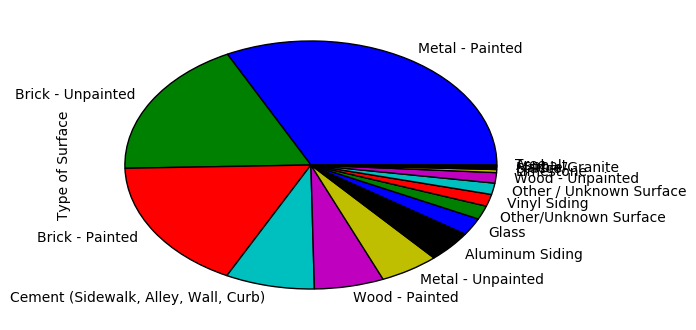

In [64]:
graf_by_sub = master[master['Type of Service Request'] == 'Graffiti Removal']['Subtype'].value_counts()
graf_by_sub.plot.pie(label='Type of Surface')

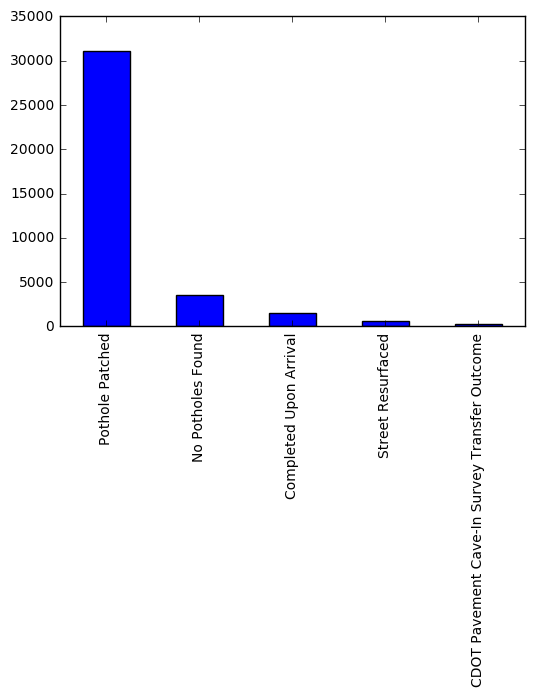

In [82]:
pot_by_sub = master[master['Type of Service Request'] == 'Pothole in Street']['Subtype'].value_counts()[:5]
pot_by_sub.plot.bar(label='Type of Surface')

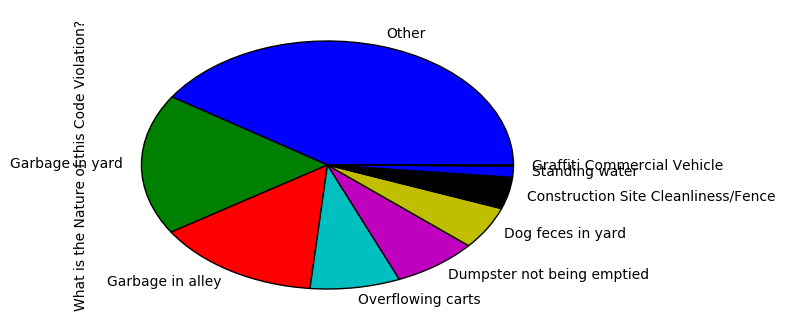

In [89]:
sani_by_sub = master[master['Type of Service Request'] == 'Sanitation Code Violation']['Subtype'].value_counts()
sani_by_sub.plot.pie(label='What is the Nature of this Code Violation?')

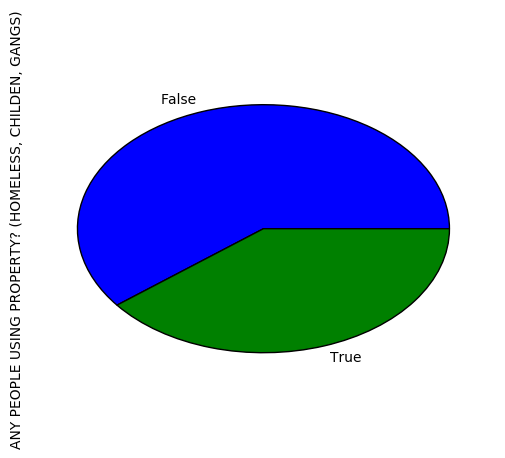

In [135]:
vacant_by_sub = master[master['Type of Service Request'] == 'Vacant/Abandoned Building']['Subtype'].value_counts()
vacant_by_sub.plot.pie(label='ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)')

In [141]:
graf_by_comm = master[master['Type of Service Request'] == 'Graffiti Removal']['Community'].value_counts()
graf_by_comm[:10]

WEST TOWN          9149
LOGAN SQUARE       7881
NEW CITY           5984
AVONDALE           5339
SOUTH LAWNDALE     4885
UPTOWN             4625
CHICAGO LAWN       4415
WASHINGTON PARK    4317
DUNNING            4177
WEST RIDGE         3807
Name: Community, dtype: int64

In [142]:
vacant_by_comm = master[master['Type of Service Request'] == 'Vacant/Abandoned Building']['Community'].value_counts()
vacant_by_comm[:10]

LINCOLN PARK              453
ASHBURN                   316
SOUTH DEERING             297
WASHINGTON HEIGHTS        280
CLEARING                  249
HEGEWISCH                 214
AUBURN GRESHAM            212
ROSELAND                  181
GREATER GRAND CROSSING    179
AUSTIN                    158
Name: Community, dtype: int64

In [138]:
pot_by_comm = master[master['Type of Service Request'] == 'Pothole in Street']['Community'].value_counts()
pot_by_comm[:10]

WEST TOWN             1194
WOODLAWN              1114
NEAR WEST SIDE        1099
AUSTIN                1015
JEFFERSON PARK        1006
WASHINGTON HEIGHTS     922
BEVERLY                908
BRIGHTON PARK          834
IRVING PARK            827
LOWER WEST SIDE        818
Name: Community, dtype: int64

In [143]:
sani_by_comm = master[master['Type of Service Request'] == 'Sanitation Code Violation']['Community'].value_counts()
sani_by_comm[:10]

HYDE PARK             769
AUSTIN                748
WEST TOWN             747
LOGAN SQUARE          716
WASHINGTON HEIGHTS    617
SOUTH DEERING         611
HUMBOLDT PARK         561
BRIDGEPORT            553
MCKINLEY PARK         478
WASHINGTON PARK       466
Name: Community, dtype: int64

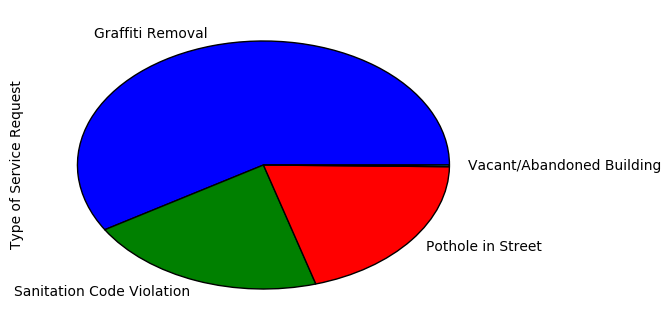

In [148]:
hp_by_type = master[master['Community'] == 'HYDE PARK']['Type of Service Request'].value_counts()
hp_by_type.plot.pie()

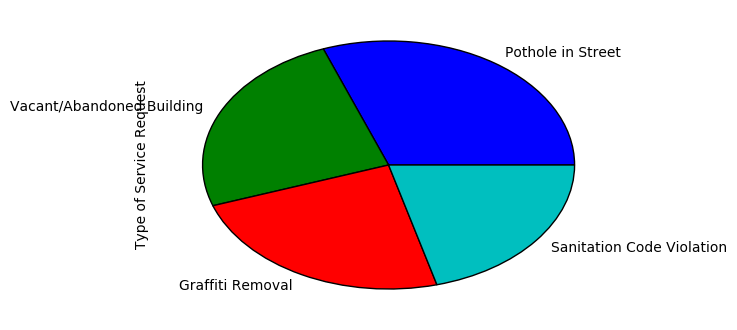

In [150]:
wt_by_type = master[master['Community'] == 'LINCOLN PARK']['Type of Service Request'].value_counts()
wt_by_type.plot.pie()

In [154]:
count_by_comm_by_subtype = pd.pivot_table(master, values='Service Request Number', index=['Community'], columns=['Type of Service Request', 'Subtype'], aggfunc=lambda x: len(x.unique())).fillna(0) 
count_by_comm_by_subtype.rename(columns={'Graffiti Removal': 'Graffiti Removal-Type of Surface', 'Pothole in Street': 'Pothole in Street- Most Recent Action', 'Sanitation Code Violation': 'Sanitation Code Violation - Nature of this Code Violation', 'Vacant/Abandoned Building': 'Vacant/Abandoned Building-ANY PEOPLE USING PROPERTY?'}, inplace=True)
count_by_comm_by_subtype

Type of Service Request Graffiti Removal-Type of Surface          \
Subtype                                  Aluminum Siding Asphalt   
Community                                                          
ALBANY PARK                                         13.0     0.0   
ARCHER HEIGHTS                                      36.0     1.0   
ARMOUR SQUARE                                       13.0     0.0   
ASHBURN                                             11.0     0.0   
AUBURN GRESHAM                                       2.0     0.0   
AUSTIN                                              19.0     0.0   
AVALON PARK                                          3.0     1.0   
AVONDALE                                           124.0     3.0   
BELMONT CRAGIN                                      12.0     3.0   
BEVERLY                                            176.0     2.0   
BRIDGEPORT                                         109.0     0.0   
BRIGHTON PARK                                       98.0     0.0   
BURNSIDE                                             8.0     0.0   
CALUMET HEIGHTS                                      1.0     0.0   
CHATHAM                                              0.0     0.0   
CHICAGO LAWN                                       265.0     4.0   
CLEARING                                           143.0     7.0   
DOUGLAS                                              0.0     0.0   
DUNNING                                            157.0     0.0   
EAST GARFIELD PARK                                   6.0     0.0   
EAST SIDE                                            0.0     0.0   
EDGEWATER                                            5.0     7.0   
EDISON PARK                                          0.0     0.0   
ENGLEWOOD                                          111.0     0.0   
FOREST GLEN                                         17.0     1.0   
FULLER PARK                                        108.0     3.0   
GAGE PARK                                          164.0     8.0   
GARFIELD RIDGE                                       2.0     0.0   
GRAND BOULEVARD                                      7.0     2.0   
GREATER GRAND CROSSING                             210.0     3.0   
...                                                  ...     ...   
NEAR NORTH SIDE                                      0.0     0.0   
NEAR SOUTH SIDE                                      2.0     0.0   
NEAR WEST SIDE                                      10.0     0.0   
NEW CITY                                           375.0     3.0   
NORTH CENTER                                         9.0     0.0   
NORTH LAWNDALE                                      21.0     0.0   
NORTH PARK                                           2.0     0.0   
NORWOOD PARK                                         1.0     0.0   
OAKLAND                                             21.0     3.0   
OHARE                                                1.0     1.0   
PORTAGE PARK                                        98.0     2.0   
PULLMAN                                              6.0     0.0   
RIVERDALE                                          174.0     0.0   
ROGERS PARK                                          0.0     0.0   
ROSELAND                                            98.0     0.0   
SOUTH CHICAGO                                        4.0     0.0   
SOUTH DEERING                                       10.0     0.0   
SOUTH LAWNDALE                                     140.0     3.0   
SOUTH SHORE                                         14.0     0.0   
UPTOWN                                             214.0     1.0   
WASHINGTON HEIGHTS                                  51.0     3.0   
WASHINGTON PARK                                     50.0     2.0   
WEST ELSDON                                        236.0     3.0   
WEST ENGLEWOOD                                      27.0     0.0   
WEST GARFIELD PARK                                   4.0

In [185]:
count_by_response_by_type = pd.pivot_table(master[master['Type of Service Request'] != 'Vacant/Abandoned Building'], values='Service Request Number', index=['Response Time'], columns=['Type of Service Request'], aggfunc=lambda x: len(x.unique())).fillna(0)

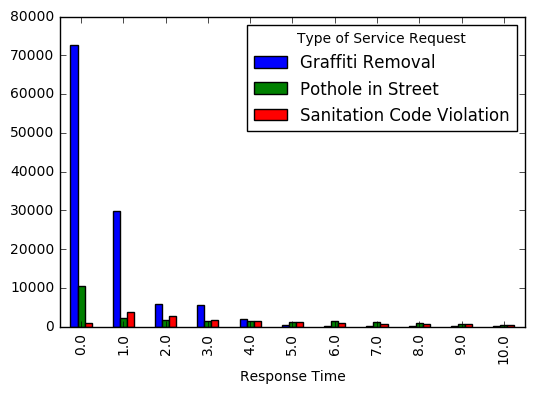

In [189]:
count_by_response_by_type[:10].plot.bar()